In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Feature Transformation

Rescaling of our data is a requirement for many machine learning algorithms as they are not scale-invariant -- rescaling falls into the category of data pre-processing and can barely be called *learning*. There exist many different rescaling techniques, and in the following example, we will take a look at a particular method that is commonly called "standardization." Here, we will recale the data so that each feature is centered at zero (mean = 0) with unit variance (standard deviation = 1).

For example, if we have a 1D dataset with the values [1, 2, 3, 4, 5], the standardized values are

- 1 -> -1.41
- 2 -> -0.71
- 3 -> 0.0
- 4 -> 0.71
- 5 -> 1.41

computed via the equation $x_{standardized} = \frac{x - \mu_x}{\sigma_x}$,
where $\mu$ is the sample mean, and $\sigma$ the standard deviation, respectively.


Which of these scenario below correct?

## Scenario 1:

scaled_dataset = (dataset - dataset_mean) / dataset_std_deviation

train, test = split(scaled_dataset)


## Scenario 2:

train, test = split(dataset)

scaled_train =  (train - train_mean) / train_std_deviation

scaled_test = (test - test_mean) / test_std_deviation


## Scenario 3:

scaled_train =  (train - train_mean) / train_std_deviation

scaled_test = (test - train_mean) / train_std_deviation


In [2]:
ary = np.array([1, 2, 3, 4, 5])
ary_standardized = (ary - ary.mean()) / ary.std()
ary_standardized

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

Although standardization is a most basic preprocessing procedure -- as we've seen in the code snippet above -- scikit-learn implements a `StandardScaler` class for this computation. And in later sections, we will see why and when the scikit-learn interface comes in handy over the code snippet we executed above.  

Applying such a preprocessing has a very similar interface to the supervised learning algorithms we saw so far.
To get some more practice, let's start by loading the iris dataset and rescale it:


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print(X_train.shape)

(112, 4)


The iris dataset is not "centered" that is it has non-zero mean and the standard deviation is different for each component:


In [97]:
print("mean: {}".format(X_train.mean(axis=0)))
print("standard deviation: {} ".format(X_train.std(axis=0)))

mean: [5.88660714 3.05178571 3.79642857 1.22321429]
standard deviation: [0.86741565 0.43424445 1.79264014 0.77793019] 


To use a preprocessing method, we first import the estimator, here StandardScaler and instantiate it:
    

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

As with the classification and regression algorithms, we call ``fit`` to learn the model from the data. As this is an unsupervised model, we only pass ``X``, not ``y``. This simply estimates mean and standard deviation.

In [6]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

Now we can rescale our data by applying the ``transform`` (not ``predict``) method:

In [7]:
X_train_scaled = scaler.transform(X_train)

``X_train_scaled`` has the same number of samples and features, but the mean was subtracted and all features were scaled to have unit standard deviation:

In [8]:
print(X_train_scaled.shape)

(112, 4)


In [98]:
print("mean: {}".format(X_train_scaled.mean(axis=0)))
print("standard deviation: {}".format(X_train_scaled.std(axis=0)))

mean: [ 1.21331516e-15 -4.41115398e-17  7.13714802e-17 -3.66770106e-16]
standard deviation: [1. 1. 1. 1.]


To summarize: Via the `fit` method, the estimator is fitted to the data we provide. In this step, the estimator estimates the parameters from the data (here: mean and standard deviation). Then, if we `transform` data, these parameters are used to transform a dataset. (Please note that the transform method does not update these parameters).

It's important to note that the same transformation is applied to the training and the test set. That has the consequence that usually the mean of the test data is not zero after scaling:

In [99]:
X_test_scaled = scaler.transform(X_test)
print("mean test data: {}".format(X_test_scaled.mean(axis=0)))

mean test data: [-0.19692712  0.05042896 -0.08461917 -0.12117658]


It is important for the training and test data to be transformed in exactly the same way, for the following processing steps to make sense of the data, as is illustrated in the figure below:

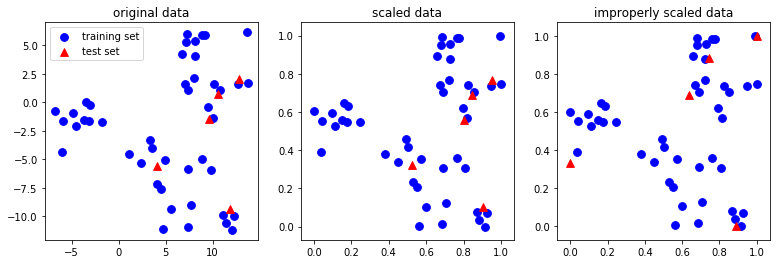

In [11]:
from figures import plot_relative_scaling
plot_relative_scaling()

There are several common ways to scale the data. The most common one is the ``StandardScaler`` we just introduced, but rescaling the data to a fix minimum an maximum value with ``MinMaxScaler`` (usually between 0 and 1), or using more robust statistics like median and quantile, instead of mean and standard deviation (with ``RobustScaler``), are also useful.

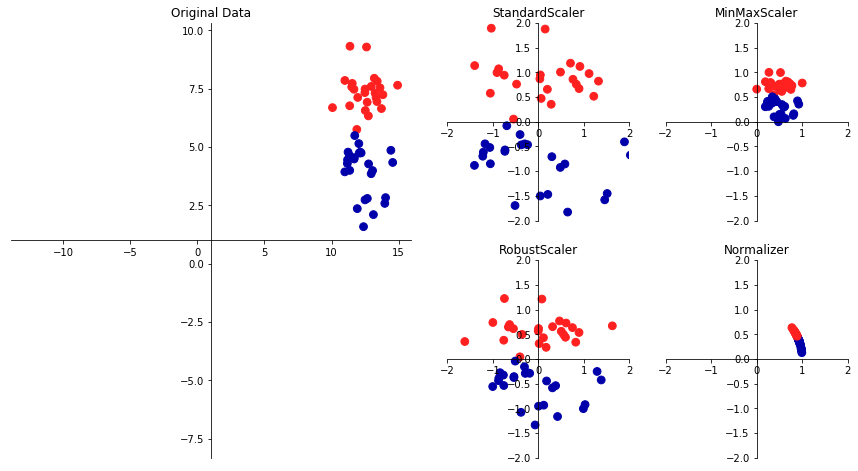

In [12]:
from figures import plot_scaling
plot_scaling()

Another fairly popular option is MinMax Scaling, which brings all the points within a predetermined interval (typically (0, 1)).

$$ \large X_{norm}=\frac{X-X_{min}}{X_{max}-X_{min}} $$

### Filling in the missing values

Not many algorithms can work with missing values, and the real world often provides data with gaps. Fortunately, this is one of the tasks for which one doesn’t need any creativity. Both key python libraries for data analysis provide easy-to-use solutions: [pandas.DataFrame.fillna](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html) and [sklearn.preprocessing.Imputer](http://scikit-learn.org/stable/modules/preprocessing.html#imputation).

These solutions do not have any magic happening behind the scenes. Approaches to handling missing values are pretty straightforward:

* encode missing values with a separate blank value like `"n/a"` (for categorical variables);
* use the most probable value of the feature (mean or median for the numerical variables, the most common value for categorical variables);
* or, conversely, encode with some extreme value (good for decision-tree models since it allows the model to make a partition between the missing and non-missing values);
* for ordered data (e.g. time series), take the adjacent value — next or previous.


Easy-to-use library solutions sometimes suggest sticking to something like `df = df.fillna(0)` and not sweat the gaps. But this is not the best solution: data preparation takes more time than building models, so thoughtless gap-filling may hide a bug in processing and damage the model.

## Categorical Features

One common type of non-numerical data is *categorical* data.
For example, imagine you are exploring some data on housing prices, and along with numerical features like "price" and "rooms", you also have "neighborhood" information.
For example, your data might look something like this:

In [18]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Bangsar'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'KLCC'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Damansara'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'KLCC'}
]

data

[{'price': 850000, 'rooms': 4, 'neighborhood': 'Bangsar'},
 {'price': 700000, 'rooms': 3, 'neighborhood': 'KLCC'},
 {'price': 650000, 'rooms': 3, 'neighborhood': 'Damansara'},
 {'price': 600000, 'rooms': 2, 'neighborhood': 'KLCC'}]

You might be tempted to encode this data with a straightforward numerical mapping:

In [19]:
{'Bangsar': 1, 'KLCC': 2, 'Damansara': 3};

It turns out that this is not generally a useful approach in Scikit-Learn: the package's models make the fundamental assumption that numerical features reflect algebraic quantities.
Thus such a mapping would imply, for example, that *Bangsar < KLCC < Damansara*, or even that *Damansara - KLCC = Bangsar*, which does not make much sense.

### Question: what would be an other solution?

In this case, one proven technique is to use *one-hot encoding*, which effectively creates extra columns indicating the presence or absence of a category with a value of 1 or 0, respectively.
When your data comes as a list of dictionaries, Scikit-Learn's ``DictVectorizer`` will do this for you:

In [20]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     1,      0,      0, 850000,      4],
       [     0,      0,      1, 700000,      3],
       [     0,      1,      0, 650000,      3],
       [     0,      0,      1, 600000,      2]], dtype=int64)

Notice that the 'neighborhood' column has been expanded into three separate columns, representing the three neighborhood labels, and that each row has a 1 in the column associated with its neighborhood.
With these categorical features thus encoded, you can proceed as normal with fitting a Scikit-Learn model.

To see the meaning of each column, you can inspect the feature names:

In [21]:
vec.get_feature_names()

['neighborhood=Bangsar',
 'neighborhood=Damansara',
 'neighborhood=KLCC',
 'price',
 'rooms']

There is one clear disadvantage of this approach: if your category has many possible values, this can *greatly* increase the size of your dataset.
However, because the encoded data contains mostly zeros, a sparse output can be a very efficient solution:

In [22]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

## LabelEncoder

In [23]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

titanic = {'name': ['Owen Harris Braund','John Bradley Cuming','Laina Heikkinen'],
           'gender':['male', 'male', 'female'],
           'ticket':['A/5 21171','PC 17599','STON/O2. 3101282'],
           'cabin':['','C85',''],
           'embarked':['S','C','S']}

df = pd.DataFrame(titanic)
df

name  gender            ticket cabin embarked
0   Owen Harris Braund    male         A/5 21171              S
1  John Bradley Cuming    male          PC 17599   C85        C
2      Laina Heikkinen  female  STON/O2. 3101282              S

In [24]:
enc = LabelEncoder()

# use df.apply() to apply le.fit_transform to all columns
X_2 = df.apply(enc.fit_transform)
X_2.head()

name  gender  ticket  cabin  embarked
0     2       1       0      0         1
1     0       1       1      1         0
2     1       0       2      0         1

## For integers: sklearn.preprocessing: OneHotEncoder

Encode categorical integer features using a one-hot aka one-of-K scheme. The input to this transformer should be a matrix of **integers**.

**Limitation:** Doesn't work with strings

In [25]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
data = np.array([[0, 0, 3], 
         [1, 1, 0], 
         [0, 2, 1], 
         [1, 0, 2]])
enc.fit(data) 

/Users/akmalabdulrashid/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [26]:
data.shape

(4, 3)

In [27]:
enc.feature_indices_

/Users/akmalabdulrashid/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function feature_indices_ is deprecated; The ``feature_indices_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


array([0, 2, 5, 9])

In [28]:
enc.transform(data)

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

## Pandas

Pandas has ``get_dummies()`` function that able to convert categorical variables to dummy/indincator variables

In [29]:
import pandas as pd
import numpy as np
my_data = np.array([[5, 'a', 1],
                    [3, 'b', 3],
                    [1, 'b', 2],
                    [3, 'a', 1],
                    [4, 'b', 2],
                    [7, 'c', 1],
                    [7, 'c', 1]])                
df = pd.DataFrame(data=my_data, columns=['y', 'dummy', 'x'])
df
just_dummy = pd.get_dummies(df['dummy'])
df_1 = pd.concat([df, just_dummy], axis=1)      
df_1.drop(['dummy'], inplace=True, axis=1)
df_1

y  x  a  b  c
0  5  1  1  0  0
1  3  3  0  1  0
2  1  2  0  1  0
3  3  1  1  0  0
4  4  2  0  1  0
5  7  1  0  0  1
6  7  1  0  0  1

In [30]:
just_dummy

a  b  c
0  1  0  0
1  0  1  0
2  0  1  0
3  1  0  0
4  0  1  0
5  0  0  1
6  0  0  1

### Exercise 1

Encode the gender using the one-hot encoding technique provided by panda's ```get_dummies``` function.

In [31]:
raw_data = {'first_name': ['Jason', 'Tina', 'Rish', 'Wesley ', 'Amy'],
        'last_name': ['Phoon', 'Lau', 'Richer', 'Lee', 'Lim'],
        'gender': ['male', 'female', 'male', 'male', 'female']}
df = pd.DataFrame(raw_data)
df.head()

first_name last_name  gender
0      Jason     Phoon    male
1       Tina       Lau  female
2       Rish    Richer    male
3    Wesley        Lee    male
4        Amy       Lim  female

In [32]:
# Your codes here

Many (though not yet all) of the Scikit-Learn estimators accept such sparse inputs when fitting and evaluating models. 

### LabelEncoder

Encode labels with value between 0 and n_classes-1. LabelEncoder assigns ordinal levels to categorical data. 

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = ["Selangor", "Selangor", "Wilayah Persekutuan", "Kedah"]
y_test = ["Wilayah Persekutuan", "Wilayah Persekutuan", "Selangor"]

le.fit_transform(y_train)

#print the encoded label
print(le.classes_)

#print the label for Test
le.transform(y_test)


['Kedah' 'Selangor' 'Wilayah Persekutuan']


array([2, 2, 1])

In [36]:
#print back the actual data values
le.inverse_transform([1,1,0,2])

array(['Selangor', 'Selangor', 'Kedah', 'Wilayah Persekutuan'],
      dtype='<U19')

In [37]:
y_test = ["Wilayah Persekutuan", "Wilayah Persekutuan", "Selangor", "KL"]
# Raises an exception: "KL" is unknown
le.transform(y_test)

ValueError: y contains previously unseen labels: ['KL']

In [38]:
# fit and transform in only one statement:
le = LabelEncoder()
y_train = ["Selangor", "Selangor", "Wilayah Persekutuan", "Kedah"]
new_y = le.fit_transform(y_train)
print(le.classes_)
new_y

['Kedah' 'Selangor' 'Wilayah Persekutuan']


array([1, 1, 2, 0])

### Exercise 2

Load the iris dataset and use the ``LabelEncoder`` to encode the 'Species' target variabe

In [39]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [40]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [94]:
# you codes here

## Text Features

Another common need in feature engineering is to convert text to a set of representative numerical values.
For example, most automatic mining of social media data relies on some form of encoding the text as numbers.


### Question: How would you convert text into a vector?


For example, consider the following set of three phrases:

In [44]:
sample = ['problem of evil',
          'the evil and the queen',
          'the horizon is the problem']

One of the simplest methods of encoding data is by *word counts*: you take each snippet of text, count the occurrences of each word within it, and put the results in a table.

For a vectorization of this data based on word count, we could construct a column representing the word "problem," the word "evil," the word "horizon," and so on.
While doing this by hand would be possible, the tedium can be avoided by using Scikit-Learn's ``CountVectorizer``:

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x8 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [46]:
X.todense()

matrix([[0, 1, 0, 0, 1, 1, 0, 0],
        [1, 1, 0, 0, 0, 0, 1, 2],
        [0, 0, 1, 1, 0, 1, 0, 2]], dtype=int64)

### Question: Why does it make sense to use a sparse matrix for the transformed data?
- How many dimensions does X have?
- How many non-zero values does one sample have?

In [47]:
vec.vocabulary_

{'problem': 5,
 'of': 4,
 'evil': 1,
 'the': 7,
 'and': 0,
 'queen': 6,
 'horizon': 2,
 'is': 3}

In [48]:
vec.inverse_transform(X)

[array(['evil', 'of', 'problem'], dtype='<U7'),
 array(['queen', 'and', 'the', 'evil'], dtype='<U7'),
 array(['is', 'horizon', 'the', 'problem'], dtype='<U7')]

The result is a sparse matrix recording the number of times each word appears; it is easier to inspect if we convert this to a ``DataFrame`` with labeled columns:

In [49]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

and  evil  horizon  is  of  problem  queen  the
0    0     1        0   0   1        1      0    0
1    1     1        0   0   0        0      1    2
2    0     0        1   1   0        1      0    2

## Imputation of Missing Data

Another common need in feature engineering is handling of missing data.
We discussed the handling of missing data in ``DataFrame``s and saw that often the ``NaN`` value is used to mark missing values.

For example, we might have a dataset that looks like this:

In [61]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [62]:
X

array([[nan,  0.,  3.],
       [ 3.,  7.,  9.],
       [ 3.,  5.,  2.],
       [ 4., nan,  6.],
       [ 8.,  8.,  1.]])

When applying a typical machine learning model to such data, we will need to first replace such missing data with some appropriate fill value.
This is known as *imputation* of missing values, and strategies range from simple (e.g., replacing missing values with the mean of the column) to sophisticated (e.g., using matrix completion or a robust model to handle such data).

The sophisticated approaches tend to be very application-specific, and we won't dive into them here.
For a baseline imputation approach, using the mean, median, or most frequent value, Scikit-Learn provides the ``SimpleImputer`` class:

In [65]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

We see that in the resulting data, the two missing values have been replaced with the mean of the remaining values in the column. This imputed data can then be fed directly into, for example, a ``LinearRegression`` estimator:

In [66]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

### Pandas: fillna

Fill NA/NaN values using the specified method. For more information, read the [documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.fillna.html)

In [83]:
import pandas as pd

raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'],
        'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
        'age': [42, np.nan, 36, 24, 73],
        'sex': ['m', np.nan, 'f', 'm', 'f'],
        'preTestScore': [4, np.nan, np.nan, 2, 3],
        'postTestScore': [25, np.nan, np.nan, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df

#Fill in missing data with zeros
#df.fillna(0)

first_name last_name   age  sex  preTestScore  postTestScore
0      Jason    Miller  42.0    m           4.0           25.0
1        NaN       NaN   NaN  NaN           NaN            NaN
2       Tina       Ali  36.0    f           NaN            NaN
3       Jake    Milner  24.0    m           2.0           62.0
4        Amy     Cooze  73.0    f           3.0           70.0

In [84]:
# Fill in missing in preTestScore with the mean value of preTestScore
df["preTestScore"].fillna(df["preTestScore"].mean(), inplace=True)
df

first_name last_name   age  sex  preTestScore  postTestScore
0      Jason    Miller  42.0    m           4.0           25.0
1        NaN       NaN   NaN  NaN           3.0            NaN
2       Tina       Ali  36.0    f           3.0            NaN
3       Jake    Milner  24.0    m           2.0           62.0
4        Amy     Cooze  73.0    f           3.0           70.0

In [80]:
# Fill in missing in postTestScore with the median value of postTestScore
df["postTestScore"].fillna(df["postTestScore"].median(), inplace=True)
df

first_name last_name   age  sex  preTestScore  postTestScore
0      Jason    Miller  42.0    m           4.0           25.0
1        NaN       NaN   NaN  NaN           3.0           62.0
2       Tina       Ali  36.0    f           3.0           62.0
3       Jake    Milner  24.0    m           2.0           62.0
4        Amy     Cooze  73.0    f           3.0           70.0

In [88]:
# Fill in missing in age with the ffill
df["age"].fillna(method='ffill', inplace=True)
df


first_name last_name   age  sex  preTestScore  postTestScore
0      Jason    Miller  42.0    m           4.0           25.0
1        NaN       NaN  42.0  NaN           3.0            NaN
2       Tina       Ali  36.0    f           3.0            NaN
3       Jake    Milner  24.0    m           2.0           62.0
4        Amy     Cooze  73.0    f           3.0           70.0

In [89]:
df.fillna(df.mean())

first_name last_name   age  sex  preTestScore  postTestScore
0      Jason    Miller  42.0    m           4.0      25.000000
1        NaN       NaN  42.0  NaN           3.0      52.333333
2       Tina       Ali  36.0    f           3.0      52.333333
3       Jake    Milner  24.0    m           2.0      62.000000
4        Amy     Cooze  73.0    f           3.0      70.000000

### Exercise 

Read the [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) and impute the missing values.


In [90]:
import pandas as pd

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None, sep=',', na_values='?')
data.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
data.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0